# Capston Project: Analytic Report & Research Proposal

## Evolution of GPD and Household Electricity Consumption 2000-2014

In [15]:
import numpy as np
import pandas as pd
import scipy
import matplotlib.pyplot as plt
from scipy.stats import ttest_ind
from scipy import stats
import itertools
import seaborn as sns
%matplotlib inline

In [16]:
w = pd.read_csv('https://raw.githubusercontent.com/borja876/Thinkful-DataScience-Borja/master/Electricity%20Consumption.csv')
x = pd.read_csv('https://raw.githubusercontent.com/borja876/Thinkful-DataScience-Borja/master/GDP%20current%20prices.csv')
y = pd.read_csv('https://raw.githubusercontent.com/borja876/Thinkful-DataScience-Borja/master/Population.csv')

In [17]:
df = pd.DataFrame(w)
df1 = pd.DataFrame(x)
df2 = pd.DataFrame(y)

# Data sets description

The purpose of this report is to analyze the evolution of the household electricity market and GDP per continent in the period 2000-2014. This will show how different economic cycles have affected both variables and the potential correlation between them. Furthermore, in a per continent basis, the both variables will be scrutinized to depict the similarities and differences between continents that will show the relationship between them. Three data sets have been imported from United Nations (from now onwards UN) database. The data sets contain global information for the time span 2000-2014 regarding:

1. Electricity consumption for the household market (GhW). In this dataset, the UN has estimated values for some countries (ex-colonies of the UK) based on their April-March consumption. This estimation has been done up until 2004 yearly electricity consumption was standardized following the natural year and not the fiscal year. Electricity consumption in Iraq in 2014 has a null value, as it was not reported due to the war that started in 2015.

2. GDP per country in current USD. From all the data sets available, measuring GDP the one measuring it in current USD has been chosen to avoid the impact of the different base years across countries when calculating the base of the deflation year and to avoid the use of different exchange rates across countries during the time span under analysis.

3. Population. In this case, the population has been converted into (Thousands) as a unit to make the standardized GDP and electricity consumption significant. This variable shows the net population at the end of the year considering births, deaths and declared migration.

The three of them are significant because, although different data sets containing this information exist, only this institution (UN) gathers them. They are consistent in terms of the methods used to gather this information and credible due to the institution that is providing them. The three variables can be compared against each other reducing the bias that may exist in the data due to different data gathering technics used across countries.

Electricity consumption and GDP are two metrics that measure the wealth and wellbeing of a country. Its evolution during years can not only show where economy has experienced a slowdown and lose of welfare.

The chosen time span neutralizes the effect of the disappearance of the USSR which reduces the distortion of the obtained results. Furthermore, the evolution of these two variables before the year 2000 has not representative when predicting the future evolution of wealth and wellbeing of a country/continent or/and its economic slowdown. The main reason being that the way in which the information is gathered in both cases has changed at a macroeconomic level and base years have been adjusted in all countries to the year 2000.

Both variables, Electricity and GDP, have been analyzed after standardizing them considering the Population as the common factor. Additionally, they have been rescaled to kWh (electricity consumption) and (Million USD) to make them comparable. Household electricity consumption per individual and GDP per individual at current prices are better proxies of the welfare of the country and scaling issues disappear.

In [18]:
#Cleanse Data Frame Electricity Consumption:
#Delete rows without countries, rename columns and take out those that are not used
#Zeros are identified to see their potential impact on the data set and further results
dfa= df[:3206]
dfb= dfa.rename(columns={'Country or Area': 'Country', 'Quantity': 'Household Consumption (GWh)'})
dfc = dfb.drop(["Quantity Footnotes", "Unit", "Commodity - Transaction"], axis=1)
dfc['Year'] = dfc['Year'].astype(int)
#dfc.loc[dfc['Household Consumption (GWh)'] == 0]

In [19]:
#Cleanse Data Frame GDP Current Prices (USD):
#Cleanse Data Frame Electricity Consumption:
#Delete rows without countries, rename columns and take out those that are not used
#Zeros are identified to see their potential impact on the data set and further results
dfd= df1[:3322]
dfe= dfd.rename(columns={'Country or Area': 'Country', 'Value': 'GDP Current Prices (USD)'})
dfg = dfe.drop('Value Footnotes', axis=1)
dfg['Year'] = dfg['Year'].astype(int)
#dfg.loc[dfg['GDP Current Prices (USD)'] == 0]

In [20]:
#Cleanse Data Frame Population:
#Take out rows without countries
#Rename columns
#Clean columns taking out those that are not used
dfh= df2[:3522]
dfi= dfh.rename(columns={'Country or Area': 'Country', 'Value': 'Population'})
dfj = dfi.drop('Value Footnotes', axis=1)
dfj['Year'] = dfj['Year'].astype(int)
#dfj.loc[dfj['Population'] == 0]

In [21]:
#Merge data into a single dataset
#Cleanse new dataset
result = dfc.merge(dfg, left_on=["Country","Year"], right_on=["Country","Year"], how='outer')
result = result.merge(dfj, left_on=["Country","Year"], right_on=["Country","Year"], how='outer')
result = result.dropna()

#Rescale & rename variables in the new data set to GDP Current Prices (Million USD) & Population (Thousands)
result['GDP Current Prices (Million USD)']=result['GDP Current Prices (USD)']/1000000
result['Population (Thousands)']=result['Population']/1000

#Drop redundant columns after merging the data sets
result = result.drop('GDP Current Prices (USD)',1)
result = result.drop('Population',1)
result= result.rename(columns={'GDP Current Prices (USD)': 'GDP Current Prices (Million USD)', 'Population': 'Population (Thousands)'})

#Use population as a common ground to standardise GDP and household consumption to standardise both variables
result['Standard GDP Current Prices (USD)'] = (result['GDP Current Prices (Million USD)']*1000)/result['Population (Thousands)']
result['Standard Household Consumption (kWh)'] = (result['Household Consumption (GWh)']*1000)/result['Population (Thousands)']

A list of countries per continent has been imported from a different source (https://gist.github.com/pamelafox/986163). The use of this list aims to group by continent the information provided by the UN at a country level. This has risen additional difficulties due to the use different names between sources for several countries, for example: Russian Federation vs. Russia, Netherlands vs. The Netherlands, etc. Moreover, some countries have been identified in the original data set that are not included in the original list. This have been added to the list for the completeness. The aim of this addition is to have all continents accurately represented. America has been split into North and South America to have a detailed view of the evolution of both regions independently and to avoid distortion. The final continents used are:

1. Africa
2. Oceania
3. North America
4. South America
5. Europe
6. Asia

In [22]:
#Import list of countries per continent from external data set and clean the columns that will not be used.
countries = pd.read_json('https://raw.githubusercontent.com/borja876/Thinkful-DataScience-Borja/master/countries.txt')
countries =countries.drop (['capital','code','timezones'],1)

#Merge both data sets for have a complete working data set
result = result.merge(countries, left_on=["Country"], right_on=["name"], how='inner')
result = result.drop('name',1)
result = result.rename(columns={'continent': 'Continent'})

After checking that all countries considered by the UN are captured in the eternal list of countries used to group them by continent the final data set is created. The following table shows the first five rows of the final data set that will be used for the purpose of this report:

In [23]:
result.head()

,Country,Year,Household Consumption (GWh),GDP Current Prices (Million USD),Population (Thousands),Standard GDP Current Prices (USD),Standard Household Consumption (kWh),Continent
0,Afghanistan,2014,2204.9,20050.189882,31627.506,633.947864,69.714634,Asia
1,Afghanistan,2013,1633.5,20046.334304,30682.500,653.347488,53.238817,Asia
2,Afghanistan,2012,1922.0,20536.542737,29726.803,690.842629,64.655456,Asia
3,Afghanistan,2011,1145.0,17930.239400,28809.167,622.379654,39.744294,Asia
4,Afghanistan,2010,1387.0,15936.800636,27962.207,569.940729,49.602665,Asia


### Exploratory Data Analysis

The following summary statistics have been conducted. In the table below, it can be seen the difference between extreme values for all variables, ranging from zero/tens to millions for electricity consumption and GDP. Once standardized variances continue to be high. This recommends the use of the median instead of the mean to avoid the effect of these extreme values. These extreme values come from United States (North America) which is equivalent to the whole Europe and Iraq (min) as zero for 2014.
The values of Skewness and Kurtosis show that variables cannot be following a normal distribution.

In [24]:
summary = result.describe().astype(int)
summary.drop('Year',1)
v = result.var()
v1 = pd.DataFrame(v, columns=['Var'])
w=result.skew()
w1 = pd.DataFrame(w, columns=['Skew'])
ww=result.kurt()
ww1 = pd.DataFrame(ww, columns=['kurt'])
df55 = v1.assign(Skew=w1.values, Kurt=ww1.values)
df56=df55.transpose()
frames = [summary, df56]
summaryb = pd.concat(frames).drop('Year',1)
summaryb

,Household Consumption (GWh),GDP Current Prices (Million USD),Population (Thousands),Standard GDP Current Prices (USD),Standard Household Consumption (kWh)
count,2.404000e+03,2.404000e+03,2.404000e+03,2.404000e+03,2.404000e+03
mean,2.602300e+04,3.260570e+05,3.744600e+04,1.285000e+04,9.970000e+02
std,1.155270e+05,1.301789e+06,1.430070e+05,1.853300e+04,1.323000e+03
min,0.000000e+00,1.300000e+01,9.000000e+00,1.060000e+02,0.000000e+00
25%,2.720000e+02,4.350000e+03,1.368000e+03,1.140000e+03,1.430000e+02
50%,2.406000e+03,1.934400e+04,7.144000e+03,4.429000e+03,4.990000e+02
75%,1.257800e+04,1.372760e+05,2.112000e+04,1.591200e+04,1.363000e+03
max,1.445712e+06,1.734807e+07,1.364270e+06,1.166120e+05,8.475000e+03
Var,1.334670e+10,1.694657e+12,2.045109e+10,3.435078e+08,1.752481e+06
Kurt,1.064086e+02,8.483685e+01,6.319272e+01,5.364767e+00,7.510758e+00


A t test has been conducted showing that the difference in means between both the standard electricity consumption and the standard GDP are truly because the populations are different and not due to variability. As both original variables are representing different populations, the standardised ones follow the same principle (as it can deducted from the obtained p values).

In [25]:
print(ttest_ind(result['Household Consumption (GWh)'], result['GDP Current Prices (Million USD)'], equal_var=False))
print(ttest_ind(result['Standard Household Consumption (kWh)'], result['Standard GDP Current Prices (USD)'], equal_var=False))

Ttest_indResult(statistic=-11.256236797599108, pvalue=1.0845783819097141e-28)
Ttest_indResult(statistic=-31.277206681394773, pvalue=9.7997898470784634e-181)


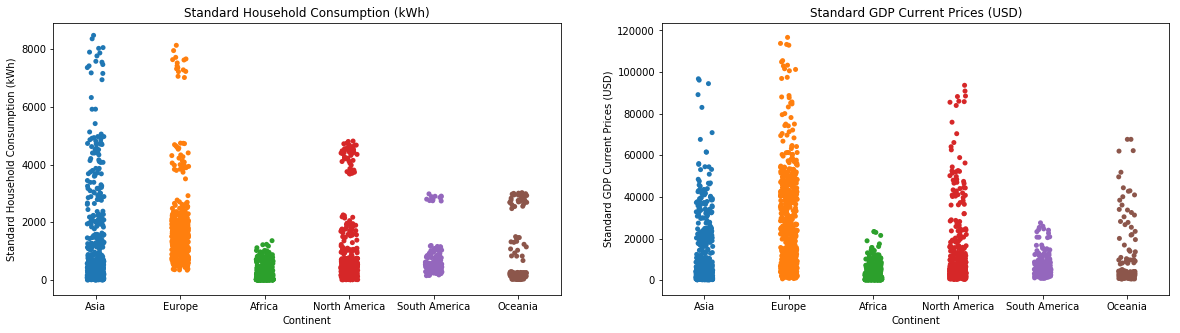

In [82]:
#Show the prices with a stripplot
plt.figure(figsize=(20, 5))

plt.subplot(1, 2, 1)
sns.stripplot(x="Continent", y="Standard Household Consumption (kWh)", data=result, jitter=True)
plt.title('Standard Household Consumption (kWh)')

plt.subplot(1, 2, 2)
sns.stripplot(x="Continent", y="Standard GDP Current Prices (USD)", data=result, jitter=True)
plt.title('Standard GDP Current Prices (USD)')

Initial exploration of the data set per continent shows that Europe and Asia are the continents that have greater variance in both Standard Household Consumption and Standard GDP Current prices (USD). There is no evidence that there is any kind of correlation between both variables. As it can be seen in the graph below, none of the variables follow a normal distribution. All are skewed to lower values of the variables showing different levels of dispersion. This could be due to the difference between countries and years in each continent, both in terms of GDP and electricity consumption.

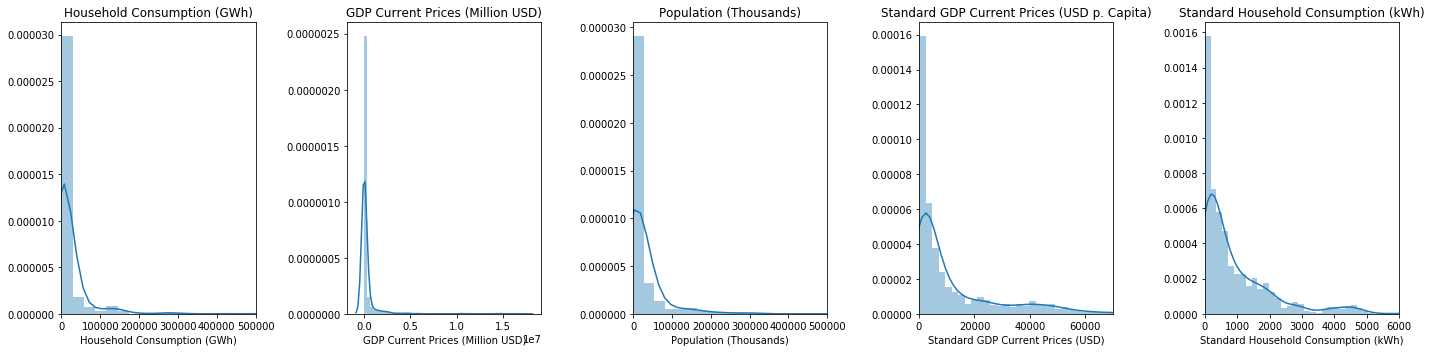

In [54]:
#Distribution of the variable price
plt.figure(figsize=(20, 5))

plt.subplot(1, 5, 1)
sns.distplot(result['Household Consumption (GWh)'])
plt.xlim([0, 500000])
plt.title('Household Consumption (GWh)')

plt.subplot(1, 5, 2)
sns.distplot(result['GDP Current Prices (Million USD)'])
plt.title('GDP Current Prices (Million USD)')

plt.subplot(1, 5, 3)
sns.distplot(result['Population (Thousands)'])
plt.xlim([0, 500000])
plt.title('Population (Thousands)')

plt.subplot(1, 5, 4)
sns.distplot(result['Standard GDP Current Prices (USD)'])
plt.xlim([0, 70000])
plt.title('Standard GDP Current Prices (USD p. Capita)')

plt.subplot(1, 5, 5)
sns.distplot(result['Standard Household Consumption (kWh)'])
plt.xlim([0, 6000])
plt.title('Standard Household Consumption (kWh)')

plt.tight_layout()
plt.show()

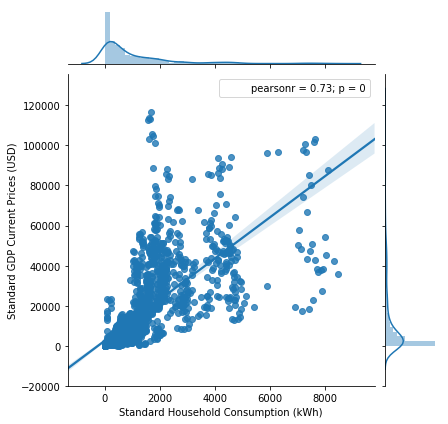

In [95]:
#Density regions for the relationship between availability and price
sns.jointplot("Standard Household Consumption (kWh)", "Standard GDP Current Prices (USD)", data=result,kind="reg", fit_reg=True)

At a global level it seems that there is a high correlation between the household electricity consumption and GDP. There have been different policies in place around the world in the period under analysis to reduce the electricity consumption. Furthermore, appliances of all sort have evolved to be more efficient in terms of electricity consumption. Nevertheless, there is still a strong correlation between both variables.

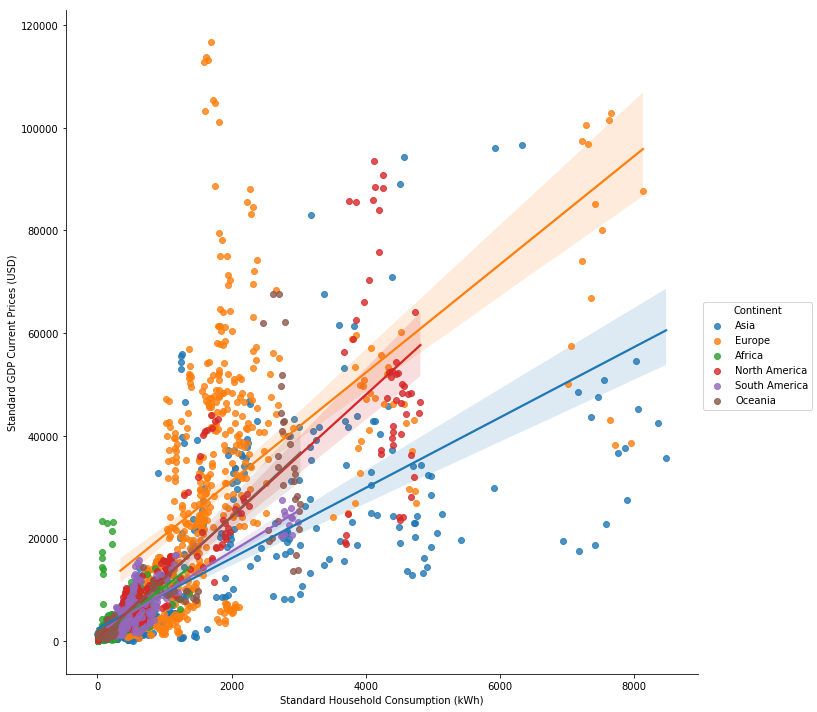

In [64]:
g = sns.lmplot(x="Standard Household Consumption (kWh)", y="Standard GDP Current Prices (USD)", hue="Continent",
               truncate=True, size=10, data=result)

# Use more informative axis labels than are provided by default
g.set_axis_labels("Standard Household Consumption (kWh)", "Standard GDP Current Prices (USD)")

A closer inspection of the correlation between both variables show that there are different levels of relationship between both variables. North America is the continent with the strongest correlation between both variables followed by Europe and Asia. In all three cases, different energy saving policies were introduced between 2000 and 2014 at different stages and focusing on different aspects of household demand. It seems that Northern hemisphere countries have a stronger reliance on electricity to grow their economies and that electricity saving policies are not having the desired outcome or at least they are lagging in terms of the expected results.

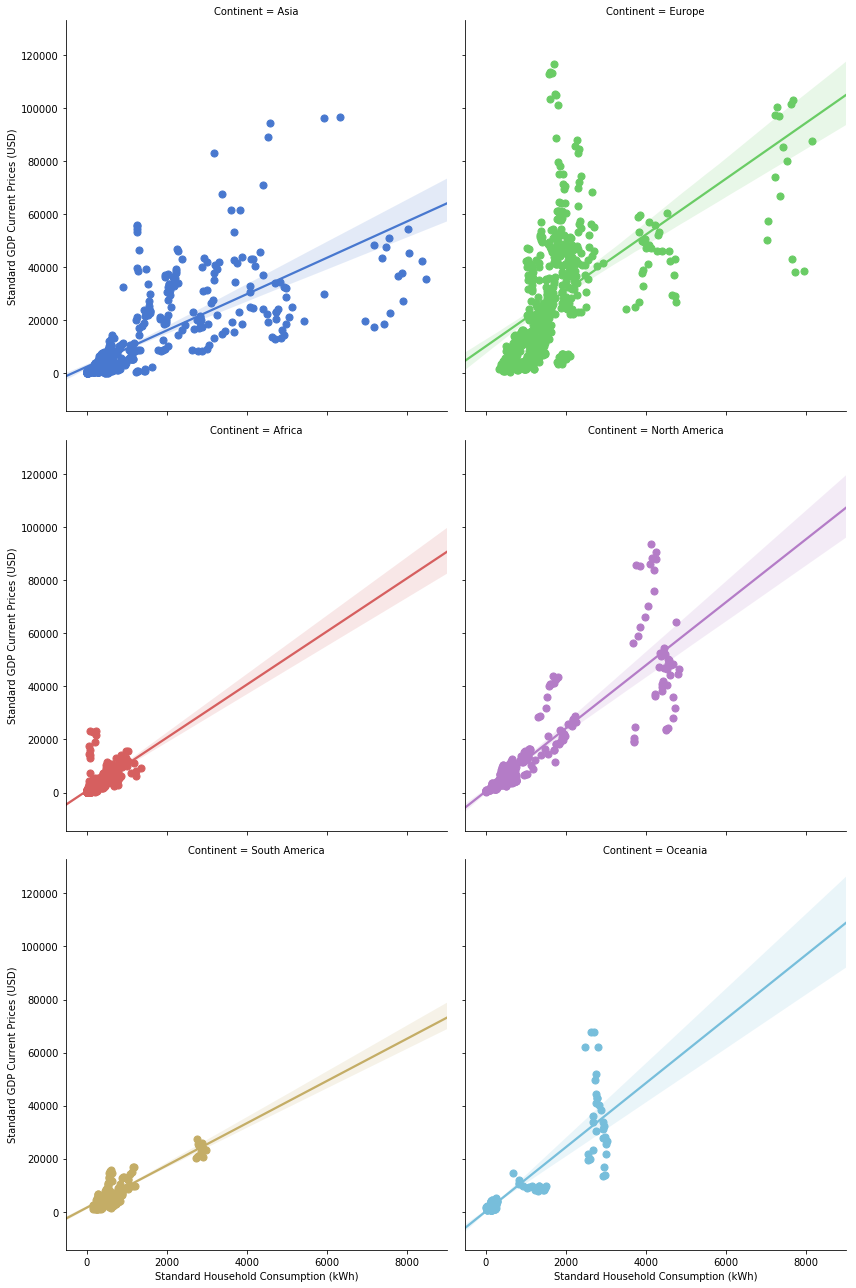

In [89]:
sns.lmplot(x="Standard Household Consumption (kWh)", y="Standard GDP Current Prices (USD)", col="Continent", hue="Continent", data=result,
           col_wrap=2, fit_reg= True, palette="muted", size=6,
           scatter_kws={"s": 50, "alpha": 1})

The previous graph supports the initial hyptothesis although there is lack of detail in terms of understanding if there has been a change of trend regarding the relationship between electricity consumption and GDP. 

### Request for Comments

**The problem** Countries in the northern hemisphere are heavily reliant on the consumption of electricity to grow their economies and demand-side energy saving policies are not been effective in terms of the outcome. There is a strong positive correlation between GDP growth and household electricity consumption growth between 2000-2014. The continents that present a stronger relationship between both are North Amercia followed by Europe and Asia. These three countries have been the ones that have experienced a bigger concern in terms of electricity consumption and energy saving initiatives during the past decade. From southern-hemisphere continents, Oceania seems to be the one more reliatn in electricity to grow its GDP, although less than the northern ones, its the first of the southern continents. This continent has been the flagship of energy saving measures adopted in Europe and North America, specially regarding the redesign of electricity merkets and the use of infrastructure. 

**The potential solution** The introduction of green tax that doubles the price of electricity during peak hours above a certain threshold should incentivise developed economies to reduce their dependency on electricity consumption to grow their economies.

#### The method of testing the solution

**Design** Analyse the countries in which energy saving measures have been introduced and compare them to southern economies in which electricity prices and correlation between growth and electricity consumption is lower.

**Analysis plan** In Europe and Asia, split into two groups the ones that have high prices during peak hours and the ones that have low prices and analyse the energy saving measures that have been introduced and the point in time in which they were introduced. As the 2020 horizon will be the comparison point between countries, compare the electricity consumption and GDP during the next three years in northern economies.

Analyse the measures and countries in which they have been introduced that are based on quantity and not price, paying special attention to the countries in which electricity consumption has been halved (UK). The analysis has to be done in a year by year basis to avoid seasonality and weather conditions.

Compare the relationship between electricity consumption and GDP in the abovementioned countries. If in the next three years those that reduced the consumption didn´t experience an increase in prices, compare them to those in which these methods were not introduced, reducing the time span from the date in which it was introduced to 2020. If there is a reduction of more than 10% in the electricity consumption ceteris paribus GDP then an equivalent measure of raising electricity consumption taxes by double could be an effective measure once introduced in the country/continent. If electricity consumption is less than 10% then the introduction of these measures will not mean a significant reduction in electricity consumption.

**Potential outcomes** NHST between both groups could show the distance between averages (in the correlation factor between low-end and hihg-end countries). If the distances between means is significant enough (with p < 0.05), then measures of this type have a significant impact in developed countries to reduce electricity consumption and is not due to random reasons away from policy making.